# Project - A comparitive study of hate speech detection on social media websites using various machine learning models

## Importing my dataset

In [1]:
import pandas as pd
import csv
import matplotlib.pyplot as plt

label_dataset_path ="C:/Users/vasistha/Textmining/Text-Mining-Semester-Project/labeled_data.csv"

label_csv= pd.read_csv(label_dataset_path)
print('The dataset length is : ', len(label_csv))


The dataset length is :  24783


## Preprocessing Stage -1 

In [2]:
import math
##I would like to divide the training set and test data set withihn this lablled csv
total_dataset_length = len(label_csv)
training_dataset_length = math.floor(total_dataset_length*0.7)
testing_dataset_length = total_dataset_length -training_dataset_length
print('Training dataset length is : ', training_dataset_length, ' and testing dataset length is : ',testing_dataset_length )
tweet_list_training = label_csv.iloc[0:training_dataset_length]["tweet"].tolist()

##printing to check wether the dataset has been converted into list properly or not
##print(tweet_list_training[523:533])

## Now in the dataset, label is done numerically but let's convert that to some phrases and write it to csv files

new_label_list=[]
class_list = label_csv.iloc[0:]["class"].tolist()


for i in class_list:
    if i == 0:
        new_label_list.append('Hate Comment')
    elif i==1: 
        new_label_list.append('Offensive Comment')
    elif i==2:
        new_label_list.append('Neither')

## printing random list values to check whether the above operation worked properly or not
##print(new_label_list[205:220])

 



Training dataset length is :  17348  and testing dataset length is :  7435


In [3]:
## Inserting the new column to the data frame first
list_of_columns= label_csv.dtypes
label_csv.insert( loc=len(list_of_columns) ,column="new_label",value=new_label_list)
label_csv.to_csv(label_dataset_path)
print('Insert completed')

ValueError: cannot insert new_label, already exists

## Dataset Statistics 

In [4]:
list_of_columns= label_csv.dtypes
number_of_offensive_comments = len(label_csv.loc[label_csv['new_label']=='Offensive Comment'])
print('The number of offensive comments in the whole dataset are : ', number_of_offensive_comments)

number_of_hate_comments = len(label_csv.loc[label_csv['new_label']=='Hate Comment'])
print('The number of hate comments in the whole dataset are : ', number_of_hate_comments)

number_of_okay_comments= len(label_csv.loc[label_csv['new_label']=='Neither'])
print('The number of okay comments in the whole dataset are : ', number_of_okay_comments)

print()
## The above is for whole dataset. Let's try to get the same for training dataset
training_dataframe = tweet_list_training = label_csv.iloc[0:training_dataset_length]

number_of_offensive_comments_training = len(training_dataframe.loc[label_csv['new_label']=='Offensive Comment'])
print('The number of offensive comments in the training dataset are : ', number_of_offensive_comments_training)

number_of_hate_comments_training = len(training_dataframe.loc[label_csv['new_label']=='Hate Comment'])
print('The number of hate comments in the training dataset are : ', number_of_hate_comments_training)

number_of_okay_comments_training= len(training_dataframe.loc[label_csv['new_label']=='Neither'])
print('The number of okay comments in the training dataset are : ', number_of_okay_comments_training)

## Given the ratio of the whole dataset, this propotion in training dataset is not bad.

## We will look into each class dimension of training dataset, a bit later in the project. Now let's preprocess further



The number of offensive comments in the whole dataset are :  19190
The number of hate comments in the whole dataset are :  1430
The number of okay comments in the whole dataset are :  4163

The number of offensive comments in the training dataset are :  13319
The number of hate comments in the training dataset are :  1103
The number of okay comments in the training dataset are :  2926


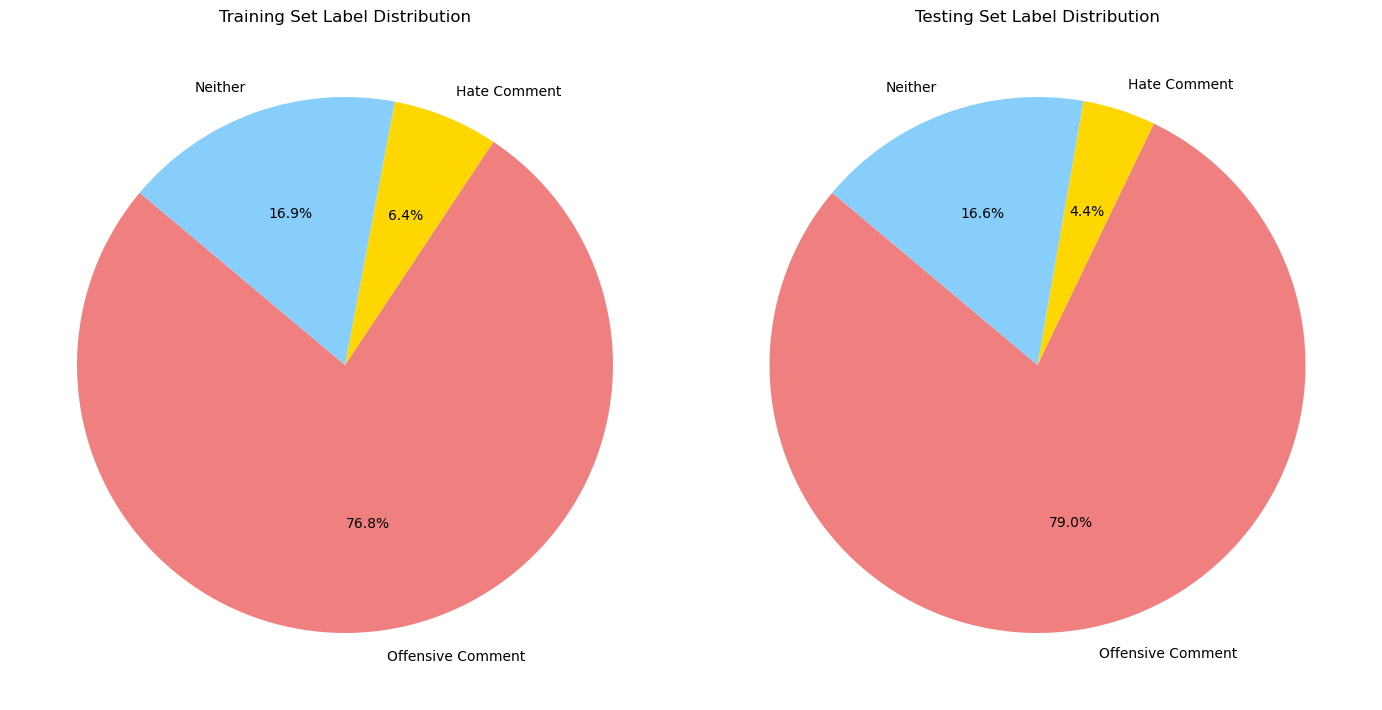

In [5]:
import matplotlib.pyplot as plt

# Count the labels in the training set
number_of_offensive_comments_training = len(training_dataframe.loc[training_dataframe['new_label'] == 'Offensive Comment'])
number_of_hate_comments_training = len(training_dataframe.loc[training_dataframe['new_label'] == 'Hate Comment'])
number_of_okay_comments_training = len(training_dataframe.loc[training_dataframe['new_label'] == 'Neither'])

# Count the labels in the testing set
testing_dataframe = label_csv.iloc[training_dataset_length:]  # Testing dataset
number_of_offensive_comments_testing = len(testing_dataframe.loc[testing_dataframe['new_label'] == 'Offensive Comment'])
number_of_hate_comments_testing = len(testing_dataframe.loc[testing_dataframe['new_label'] == 'Hate Comment'])
number_of_okay_comments_testing = len(testing_dataframe.loc[testing_dataframe['new_label'] == 'Neither'])

# Labels and values for training set pie chart
training_labels = ['Offensive Comment', 'Hate Comment', 'Neither']
training_values = [
    number_of_offensive_comments_training,
    number_of_hate_comments_training,
    number_of_okay_comments_training,
]

# Labels and values for testing set pie chart
testing_labels = ['Offensive Comment', 'Hate Comment', 'Neither']
testing_values = [
    number_of_offensive_comments_testing,
    number_of_hate_comments_testing,
    number_of_okay_comments_testing,
]

# Create subplots for the training and testing pie charts
fig, axes = plt.subplots(1, 2, figsize=(14, 7))

# Training set pie chart
axes[0].pie(
    training_values, 
    labels=training_labels, 
    autopct='%1.1f%%', 
    startangle=140, 
    colors=['lightcoral', 'gold', 'lightskyblue']
)
axes[0].set_title('Training Set Label Distribution')

# Testing set pie chart
axes[1].pie(
    testing_values, 
    labels=testing_labels, 
    autopct='%1.1f%%', 
    startangle=140, 
    colors=['lightcoral', 'gold', 'lightskyblue']
)
axes[1].set_title('Testing Set Label Distribution')

# Display the pie charts
plt.tight_layout()
plt.show()


## Preprocessing Stage -2

In [6]:
#import the package for regular expression matching 
import re

tweets_preprocessing_list = tweet_list_training = label_csv.iloc[0:]["tweet"].tolist()
cleaned_statements_list = []
# Let's remove urls, username special characters and numbers and convert all the tweets to lower cases from all the tweets  

##106
for tweet in tweets_preprocessing_list:
    tempurl = re.sub(r'http\S+','',tweet)
    tempuser = ' '.join(re.sub("([@#][A-Za-z0-9_]+)|(\w+:\/\/\S+)"," ", tempurl).split())
    tempspecial=re.sub(r'[^a-zA-Z\s]+',' ',tempuser)
    tempspecial=tempspecial.lower()
    cleaned_statements_list.append(tempspecial)

print('One random raw tweet is : ' ,tweet_list_training [106])
print(' One random pre processed statement is : ', cleaned_statements_list[106])
    


One random raw tweet is :  "@Crhedrys: Pussy licking pussy.... meow meow #StopWhitePeople2014 &#128049; https://t.co/KeegDCjS5K&#8221;""""

&#128533;
 One random pre processed statement is :      pussy licking pussy  meow meow        


## Writing cleaned tweets to csv file

In [6]:
## Inserting the new column to the data frame first
list_of_columns= label_csv.dtypes
label_csv.insert( loc=len(list_of_columns) ,column="processed_tweets",value=cleaned_statements_list)
label_csv.to_csv(label_dataset_path)
print('Insert completed')

ValueError: cannot insert processed_tweets, already exists

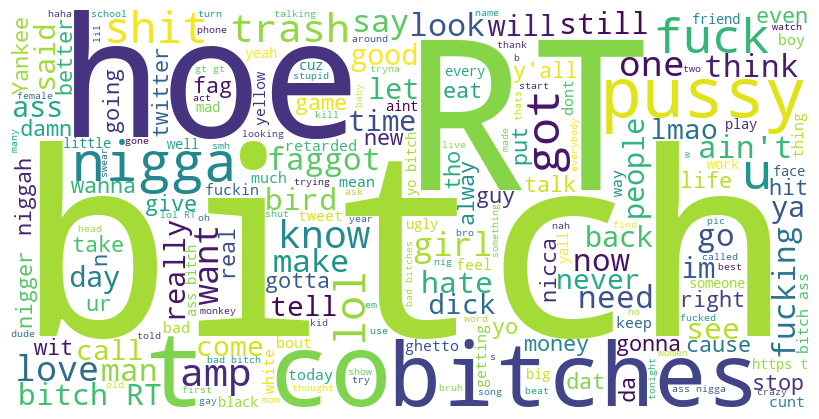

In [8]:
from wordcloud import WordCloud,STOPWORDS

text = ' '.join(label_csv.iloc[0:]['tweet'].tolist())

# Create a word cloud object
wordcloud = WordCloud(
    width=800, height=400,
    background_color='white',
    stopwords=STOPWORDS,
    min_font_size=10
).generate(text)

plt.figure(figsize=(8, 8), facecolor=None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()

## Extraction of unigram features

In [14]:
## Before extracting unigram let's import the important libraries 
from sklearn.feature_extraction.text import CountVectorizer

## Now we extract the unigrams from the training set by implementing following code
##tweets_training =  label_csv.iloc[0:training_dataset_length]["processed_tweets"]
##tweets_testing = label_csv.iloc[training_dataset_length:]["processed_tweets"]

tweets_training = label_csv.iloc[0:training_dataset_length]["processed_tweets"].fillna("")
tweets_testing = label_csv.iloc[training_dataset_length:]["processed_tweets"].fillna("")


vectorizer = CountVectorizer(ngram_range=(1,1))
vectorizer.fit(tweets_training)

## Now we use the vectorizer to represent our training data 

training_tweets_count_vector = vectorizer.fit_transform(tweets_training)
print(training_tweets_count_vector.shape)
## Now we use the vectorizer to represent our testing data 

testing_tweets_count_vector = vectorizer.transform(tweets_testing)
print(testing_tweets_count_vector.shape)

(17348, 15344)
(7435, 15344)


## Building a naive bayes model

In [15]:
## Before building model, let's import the necessary libraries 
from sklearn.naive_bayes import MultinomialNB
## Label our x axis and y axis for training and testing datasets 
x_train = training_tweets_count_vector
y_train = label_csv.iloc[0:training_dataset_length]["new_label"]
x_test = testing_tweets_count_vector
y_test = label_csv.iloc[training_dataset_length:]["new_label"]

# build model on the training data
model = MultinomialNB()
model.fit(x_train, y_train)

# predict the labels for the test data
predictions = model.predict(x_test)

## Calculation of precision, recall and f1 score 

In [35]:
## Before calculations, let's import the necessary libraries 
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import classification_report, confusion_matrix 
from sklearn.metrics import precision_recall_fscore_support
## Calculating and printing the efficiency and performance of our model using unigrams
print ("Accuracy score: ", accuracy_score(y_test, predictions))
print ("Individual label performance: ")
print (classification_report(y_test, predictions))
print (confusion_matrix(y_test, predictions))
naive_bayes_micro_avg = precision_recall_fscore_support(y_test, predictions, average='micro')
print(naive_bayes_micro_avg[0:3])

report_nb_wf = classification_report(y_test, predictions, output_dict=True)


Accuracy score:  0.881102891728312
Individual label performance: 
                   precision    recall  f1-score   support

     Hate Comment       0.43      0.04      0.07       327
          Neither       0.88      0.61      0.72      1237
Offensive Comment       0.88      0.99      0.93      5871

         accuracy                           0.88      7435
        macro avg       0.73      0.54      0.57      7435
     weighted avg       0.86      0.88      0.86      7435

[[  12   32  283]
 [   3  754  480]
 [  13   73 5785]]
(0.881102891728312, 0.881102891728312, 0.8811028917283119)


## K-fold cross validation for Naive Bayes without feature selection

In [30]:
from sklearn.model_selection import StratifiedKFold, cross_val_score
import numpy as np
from sklearn.pipeline import Pipeline

# Now below code is a one liner for performing naivebayes classification on training data set using crossing validation

pipeline_nb_wf = Pipeline([('mnb', MultinomialNB())], verbose = True)
scores_nb_wf = cross_val_score(pipeline_nb_wf, x_train , y_train, cv=5)
print("Scores of the K fold stratified cross validations= ", scores_nb_wf)
print("Average score of the K fold stratified cross validation= ", scores_nb_wf.mean())

[Pipeline] ............... (step 1 of 1) Processing mnb, total=   0.0s
[Pipeline] ............... (step 1 of 1) Processing mnb, total=   0.0s
[Pipeline] ............... (step 1 of 1) Processing mnb, total=   0.0s
[Pipeline] ............... (step 1 of 1) Processing mnb, total=   0.0s
[Pipeline] ............... (step 1 of 1) Processing mnb, total=   0.0s
Scores of the K fold stratified cross validations=  [0.85475504 0.83631124 0.85850144 0.85788412 0.85673105]
Average score of the K fold stratified cross validation=  0.8528365772428167


## Logistic regression without feature selection

In [26]:
# build model on the training data
model_lg = LogisticRegression(solver="liblinear", penalty="l1")
model_lg.fit(x_train, y_train)

# predict the labels for the test data
predictions_lg = model.predict(x_test)

In [45]:
## Before calculations, let's import the necessary libraries 
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import classification_report, confusion_matrix 
from sklearn.metrics import precision_recall_fscore_support
## Calculating and printing the efficiency and performance of our model using unigrams
print ("Accuracy score: ", accuracy_score(y_test, predictions_lg))
print ("Individual label performance: ")
print (classification_report(y_test, predictions_lg))
print (confusion_matrix(y_test, predictions_lg))
lg_micro_avg = precision_recall_fscore_support(y_test, predictions_lg, average='micro')
print(lg_micro_avg[0:3])
report_lg_wf = classification_report(y_test, predictions_lg, output_dict=True)

Accuracy score:  0.881102891728312
Individual label performance: 
                   precision    recall  f1-score   support

     Hate Comment       0.43      0.04      0.07       327
          Neither       0.88      0.61      0.72      1237
Offensive Comment       0.88      0.99      0.93      5871

         accuracy                           0.88      7435
        macro avg       0.73      0.54      0.57      7435
     weighted avg       0.86      0.88      0.86      7435

[[  12   32  283]
 [   3  754  480]
 [  13   73 5785]]
(0.881102891728312, 0.881102891728312, 0.8811028917283119)


## K-fold cross validation for logistic regression without feature selection

In [28]:
from sklearn.model_selection import StratifiedKFold, cross_val_score
import numpy as np
from sklearn.pipeline import Pipeline

from sklearn.linear_model import LogisticRegression

# Now below code is a one liner for performing logistic regression on training data set using crossing validation
logistic = LogisticRegression(solver="liblinear", penalty="l1")

# Now below code is a one liner for performing naivebayes classification on training data set using crossing validation

pipeline_lg_wf = Pipeline([(("logistic", logistic))], verbose = True)
scores_lg_wf = cross_val_score(pipeline_lg_wf, x_train , y_train, cv=5)
print("Scores of the K fold stratified cross validations= ", scores_lg_wf)
print("Average score of the K fold stratified cross validation= ", scores_lg_wf.mean())


[Pipeline] .......... (step 1 of 1) Processing logistic, total=   0.2s
[Pipeline] .......... (step 1 of 1) Processing logistic, total=   0.2s
[Pipeline] .......... (step 1 of 1) Processing logistic, total=   0.2s
[Pipeline] .......... (step 1 of 1) Processing logistic, total=   0.2s
[Pipeline] .......... (step 1 of 1) Processing logistic, total=   0.2s
Scores of the K fold stratified cross validations=  [0.90115274 0.86512968 0.89798271 0.90227731 0.909484  ]
Average score of the K fold stratified cross validation=  0.8952052888365707


## Using Feature selection to reduce high dimensionality

In [18]:
# Before the feature selection process using information gain or mutual information, let's import the necessary libraries

from sklearn.feature_selection import SelectKBest, mutual_info_classif

# Now lets put k value to 1000 features first in 2000 best features and then train our model according to that

selector = SelectKBest(mutual_info_classif, k=2000)
X_train_features_filtered_kbest = selector.fit_transform(training_tweets_count_vector, y_train)
print ("Train feature space before filtering: ", training_tweets_count_vector.shape)
print ("Train feature space after filtering: ", X_train_features_filtered_kbest.shape)

X_test_features_filtered_kbest = selector.transform(testing_tweets_count_vector)
print ("Test feature space before filtering: ", testing_tweets_count_vector.shape)
print ("Test feature space after filtering: ", X_test_features_filtered_kbest.shape)

Train feature space before filtering:  (17348, 15344)
Train feature space after filtering:  (17348, 2000)
Test feature space before filtering:  (7435, 15344)
Test feature space after filtering:  (7435, 2000)


## Using this feature space to build our new naive bayes model

In [46]:
# Now let's use this feature space to build out naive bayes model
x_train_infogain_2000_best = X_train_features_filtered_kbest
y_train_infogain_2000_best = y_train
x_test_infogain_2000_best = X_test_features_filtered_kbest
y_test_infogain_2000_best = y_test

# build model on the training data
model_infogain_2000_best = MultinomialNB()
model_infogain_2000_best.fit(x_train_infogain_2000_best, y_train_infogain_2000_best)

# predict the labels for the test data
predictions_infogain_2000_best = model_infogain_2000_best.predict(x_test_infogain_2000_best)

#Calculate confusion martix,precision, recall, f1_score 
## Calculating and printing the efficiency and performance of our model using unigrams
print ("Accuracy score: ", accuracy_score(y_test_infogain_2000_best, predictions_infogain_2000_best))
print ("Individual label performance: ")
print (classification_report(y_test_infogain_2000_best, predictions_infogain_2000_best))
print (confusion_matrix(y_test_infogain_2000_best, predictions_infogain_2000_best))

print()
infogain_2000_micro_avg = precision_recall_fscore_support(y_test_infogain_2000_best, predictions_infogain_2000_best, average='micro')
print(infogain_2000_micro_avg[0:3])
report_nb = classification_report(y_test, predictions_infogain_2000_best, output_dict=True)

Accuracy score:  0.9004707464694015
Individual label performance: 
                   precision    recall  f1-score   support

     Hate Comment       0.42      0.14      0.21       327
          Neither       0.85      0.77      0.81      1237
Offensive Comment       0.92      0.97      0.94      5871

         accuracy                           0.90      7435
        macro avg       0.73      0.63      0.65      7435
     weighted avg       0.88      0.90      0.89      7435

[[  46   43  238]
 [   8  958  271]
 [  56  124 5691]]

(0.9004707464694015, 0.9004707464694015, 0.9004707464694015)


In [47]:
# build model on the training data
model_infogain_2000_best_2 =  LogisticRegression(solver="liblinear", penalty="l1")
model_infogain_2000_best_2.fit(x_train_infogain_2000_best, y_train_infogain_2000_best)

# predict the labels for the test data
predictions_infogain_2000_best = model_infogain_2000_best_2.predict(x_test_infogain_2000_best)

#Calculate confusion martix,precision, recall, f1_score 
## Calculating and printing the efficiency and performance of our model using unigrams
print ("Accuracy score: ", accuracy_score(y_test_infogain_2000_best, predictions_infogain_2000_best))
print ("Individual label performance: ")
print (classification_report(y_test_infogain_2000_best, predictions_infogain_2000_best))
print (confusion_matrix(y_test_infogain_2000_best, predictions_infogain_2000_best))

print()
infogain_2000_micro_avg = precision_recall_fscore_support(y_test_infogain_2000_best, predictions_infogain_2000_best, average='micro')
print(infogain_2000_micro_avg[0:3])

report_lg = classification_report(y_test, predictions_infogain_2000_best, output_dict=True)

Accuracy score:  0.9159381304640215
Individual label performance: 
                   precision    recall  f1-score   support

     Hate Comment       0.39      0.17      0.24       327
          Neither       0.83      0.93      0.88      1237
Offensive Comment       0.95      0.95      0.95      5871

         accuracy                           0.92      7435
        macro avg       0.72      0.69      0.69      7435
     weighted avg       0.90      0.92      0.91      7435

[[  57   50  220]
 [   7 1147   83]
 [  83  182 5606]]

(0.9159381304640215, 0.9159381304640215, 0.9159381304640215)


In [20]:
from sklearn.model_selection import StratifiedKFold, cross_val_score
import numpy as np
from sklearn.pipeline import Pipeline

# Now below code is a one liner for performing naivebayes classification on training data set using crossing validation

pipeline = Pipeline([('mnb', MultinomialNB())], verbose = True)
scores = cross_val_score(pipeline, x_train_infogain_2000_best , y_train, cv=5)
print("Scores of the K fold stratified cross validations= ", scores)
print("Average score of the K fold stratified cross validation= ", scores.mean())


[Pipeline] ............... (step 1 of 1) Processing mnb, total=   0.0s
[Pipeline] ............... (step 1 of 1) Processing mnb, total=   0.0s
[Pipeline] ............... (step 1 of 1) Processing mnb, total=   0.0s
[Pipeline] ............... (step 1 of 1) Processing mnb, total=   0.0s
[Pipeline] ............... (step 1 of 1) Processing mnb, total=   0.0s
Scores of the K fold stratified cross validations=  [0.90086455 0.87579251 0.89769452 0.89132315 0.90198905]
Average score of the K fold stratified cross validation=  0.8935327557460354


In [21]:
# Before Building the model, let's import all the necessary libraries

from sklearn.model_selection import StratifiedKFold, cross_val_score
import numpy as np
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression

# Now below code is a one liner for performing logistic regression on training data set using crossing validation
logistic = LogisticRegression(solver="liblinear", penalty="l1")

#Alternate code for logistic regression not used in the lab. But this gives less accuracy when compared to code used in lab
##logistic = LogisticRegression(max_iter=10000, tol=0.1)
pipeline_logistic = Pipeline([(("logistic", logistic))], verbose = True)
logistic_scores = cross_val_score(pipeline_logistic, x_train_infogain_2000_best , y_train, cv=5)
print("Scores of the K fold stratified cross validations= ", logistic_scores)
print("Average score of the K fold stratified cross validation= ", logistic_scores.mean())

[Pipeline] .......... (step 1 of 1) Processing logistic, total=   0.1s
[Pipeline] .......... (step 1 of 1) Processing logistic, total=   0.1s
[Pipeline] .......... (step 1 of 1) Processing logistic, total=   0.1s
[Pipeline] .......... (step 1 of 1) Processing logistic, total=   0.1s
[Pipeline] .......... (step 1 of 1) Processing logistic, total=   0.1s
Scores of the K fold stratified cross validations=  [0.90288184 0.86628242 0.89913545 0.90054771 0.90890747]
Average score of the K fold stratified cross validation=  0.8955509772434814


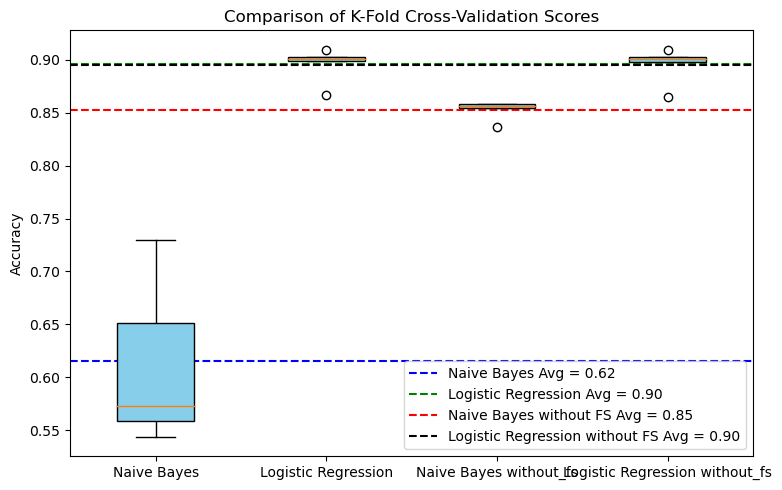

In [48]:
import matplotlib.pyplot as plt



# Combine the scores into a list for the box plot
all_scores = [scores, logistic_scores,scores_nb_wf,scores_lg_wf]

# Create the box plot
plt.figure(figsize=(8, 5))
plt.boxplot(
    all_scores, 
    patch_artist=True, 
    boxprops=dict(facecolor='skyblue', color='black'), 
    labels=['Naive Bayes', 'Logistic Regression','Naive Bayes without_fs','Logistic Regression without_fs']
)

# Add average lines for both models
plt.axhline(y=np.mean(scores), color='blue', linestyle='--', label=f'Naive Bayes Avg = {np.mean(scores):.2f}')
plt.axhline(y=np.mean(logistic_scores), color='green', linestyle='--', label=f'Logistic Regression Avg = {np.mean(logistic_scores):.2f}')
plt.axhline(y=np.mean(scores_nb_wf), color='red', linestyle='--', label=f'Naive Bayes without FS Avg = {np.mean(scores_nb_wf):.2f}')
plt.axhline(y=np.mean(scores_lg_wf), color='black', linestyle='--', label=f'Logistic Regression without FS Avg = {np.mean(scores_lg_wf):.2f}')

# Add labels and title
plt.title('Comparison of K-Fold Cross-Validation Scores')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.tight_layout()
plt.show()


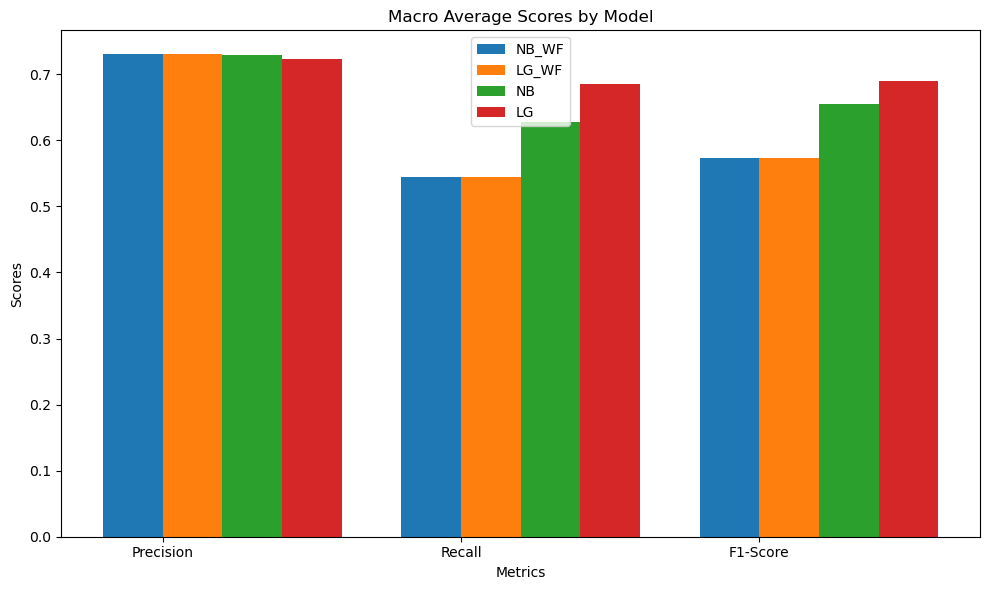

In [49]:
import matplotlib.pyplot as plt
import numpy as np

# Extract metrics for visualization
models = ['NB_WF', 'LG_WF', 'NB', 'LG']
metrics = ['Precision', 'Recall', 'F1-Score']

# Extract "macro avg" metrics for comparison
macro_avg_scores = [
    [report_nb_wf['macro avg']['precision'], report_nb_wf['macro avg']['recall'], report_nb_wf['macro avg']['f1-score']],
    [report_lg_wf['macro avg']['precision'], report_lg_wf['macro avg']['recall'], report_lg_wf['macro avg']['f1-score']],
    [report_nb['macro avg']['precision'], report_nb['macro avg']['recall'], report_nb['macro avg']['f1-score']],
    [report_lg['macro avg']['precision'], report_lg['macro avg']['recall'], report_lg['macro avg']['f1-score']],
]

# Create a grouped bar chart
x = np.arange(len(metrics))  # The label locations
width = 0.2  # The width of the bars

fig, ax = plt.subplots(figsize=(10, 6))

# Plot each model's scores
for i, (model, scores) in enumerate(zip(models, macro_avg_scores)):
    ax.bar(x + i * width, scores, width, label=model)

# Add some text for labels, title, and custom x-axis tick labels, etc.
ax.set_xlabel('Metrics')
ax.set_ylabel('Scores')
ax.set_title('Macro Average Scores by Model')
ax.set_xticks(x + width / 2)
ax.set_xticklabels(metrics)
ax.legend()

# Display the chart
plt.tight_layout()
plt.show()


In [41]:
report_nb_wf

{'Hate Comment': {'precision': 0.42857142857142855,
  'recall': 0.03669724770642202,
  'f1-score': 0.0676056338028169,
  'support': 327.0},
 'Neither': {'precision': 0.8777648428405123,
  'recall': 0.6095392077607114,
  'f1-score': 0.7194656488549619,
  'support': 1237.0},
 'Offensive Comment': {'precision': 0.8834758704948076,
  'recall': 0.9853517288366548,
  'f1-score': 0.9316370078106128,
  'support': 5871.0},
 'accuracy': 0.881102891728312,
 'macro avg': {'precision': 0.7299373806355828,
  'recall': 0.5438627281012627,
  'f1-score': 0.5729027634894638,
  'support': 7435.0},
 'weighted avg': {'precision': 0.8625184671703545,
  'recall': 0.881102891728312,
  'f1-score': 0.8583358335902106,
  'support': 7435.0}}

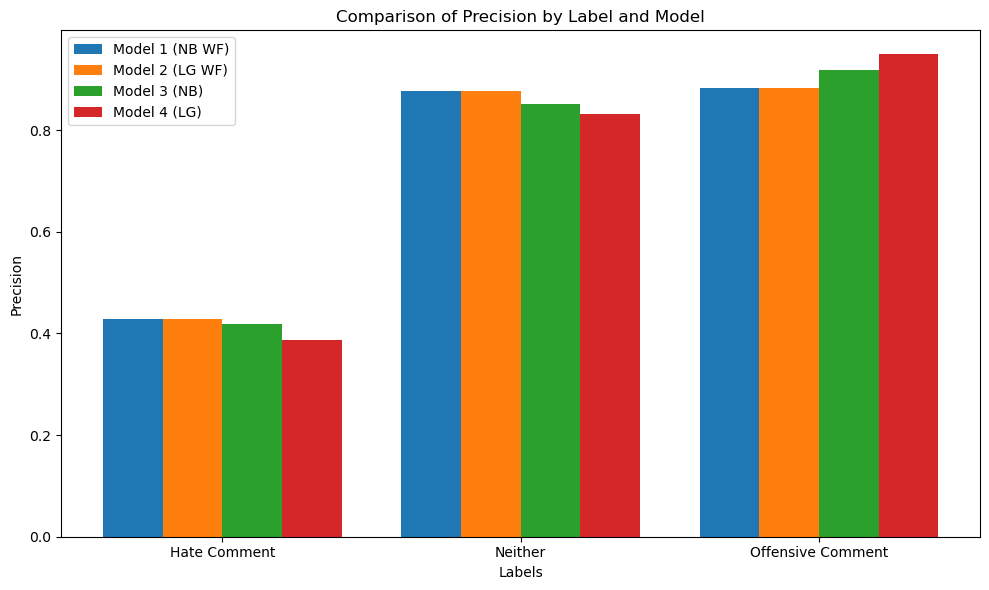

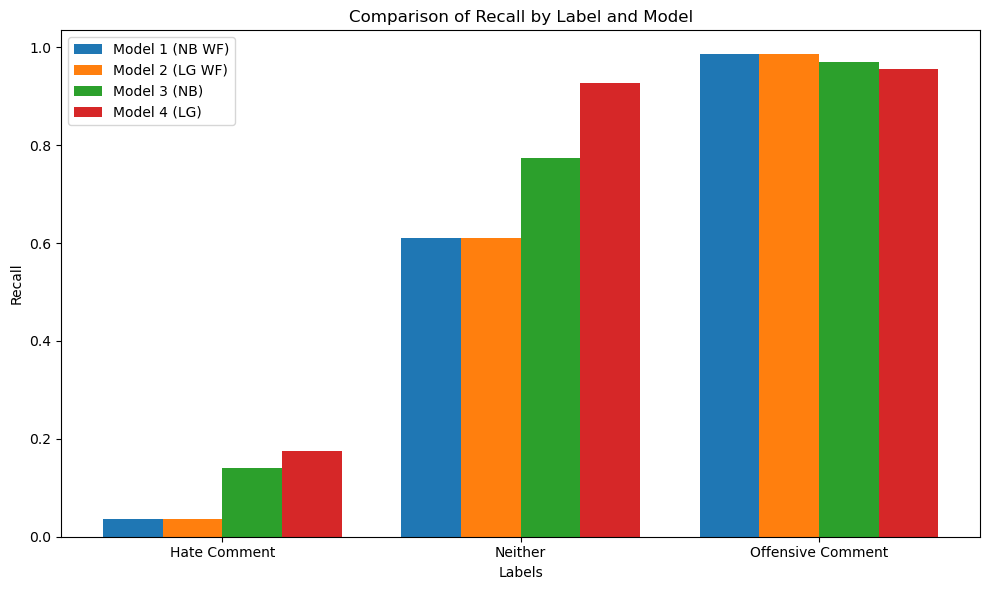

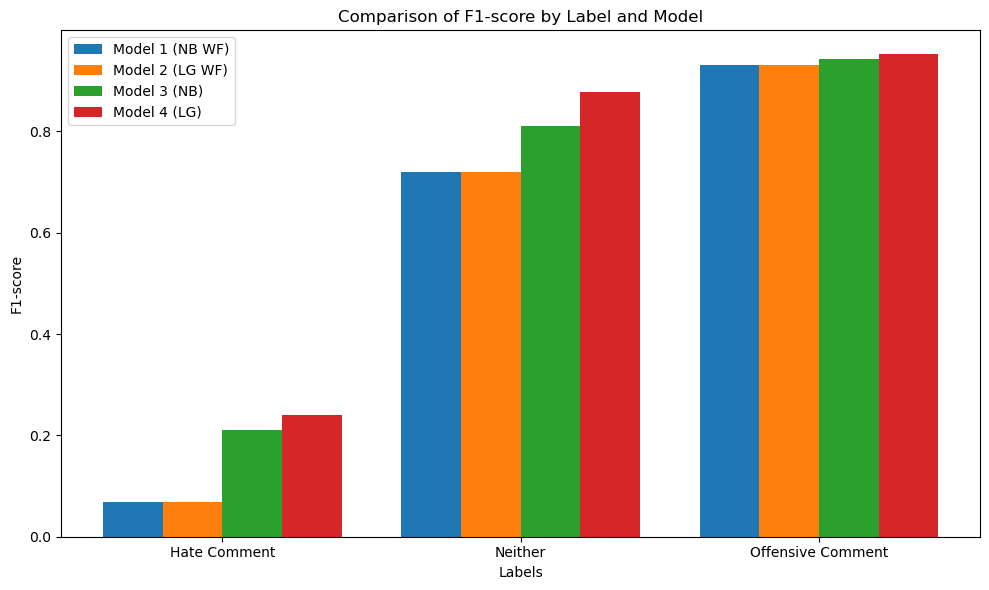

In [50]:
import matplotlib.pyplot as plt
import numpy as np

# Correctly define the reports dictionary
reports = {
    "Model 1 (NB WF)": report_nb_wf,
    "Model 2 (LG WF)": report_lg_wf,
    "Model 3 (NB)": report_nb,
    "Model 4 (LG)": report_lg,
}

# Extract labels, metrics, and models
labels = ["Hate Comment", "Neither", "Offensive Comment"]
metrics = ["precision", "recall", "f1-score"]
models = list(reports.keys())

# Prepare data for plotting
data = {metric: {label: [reports[model][label][metric] for model in models] for label in labels} for metric in metrics}

# Plot each metric
for metric in metrics:
    x = np.arange(len(labels))  # Label locations
    width = 0.2  # Width of the bars

    fig, ax = plt.subplots(figsize=(10, 6))

    # Plot bars for each model
    for i, model in enumerate(models):
        ax.bar(
            x + i * width,
            [data[metric][label][i] for label in labels],
            width,
            label=model
        )

    # Add labels, title, and legend
    ax.set_xlabel("Labels")
    ax.set_ylabel(metric.capitalize())
    ax.set_title(f"Comparison of {metric.capitalize()} by Label and Model")
    ax.set_xticks(x + width * (len(models) - 1) / 2)
    ax.set_xticklabels(labels)
    ax.legend()

    plt.tight_layout()
    plt.show()



In [1]:
pip install torch transformers


   ---------------------------------------- 0.0/199.4 MB ? eta -:--:--
   - -------------------------------------- 6.6/199.4 MB 33.5 MB/s eta 0:00:06
   --- ------------------------------------ 15.2/199.4 MB 36.7 MB/s eta 0:00:06
   ---- ----------------------------------- 24.4/199.4 MB 38.6 MB/s eta 0:00:05
   ------ --------------------------------- 34.3/199.4 MB 41.1 MB/s eta 0:00:05
   -------- ------------------------------- 44.3/199.4 MB 42.1 MB/s eta 0:00:04
   ---------- ----------------------------- 53.2/199.4 MB 41.8 MB/s eta 0:00:04
   ------------ --------------------------- 62.9/199.4 MB 42.2 MB/s eta 0:00:04
   -------------- ------------------------- 71.8/199.4 MB 42.4 MB/s eta 0:00:04
   ---------------- ----------------------- 80.7/199.4 MB 42.2 MB/s eta 0:00:03
   ----------------- ---------------------- 88.9/199.4 MB 41.7 MB/s eta 0:00:03
   ------------------- -------------------- 97.8/199.4 MB 41.6 MB/s eta 0:00:03
   -------------------- ------------------ 105.4/1

In [7]:
import torch
from transformers import BertTokenizer, BertForSequenceClassification
from torch.utils.data import TensorDataset, DataLoader
from sklearn.preprocessing import LabelEncoder
from transformers import AdamW, get_linear_schedule_with_warmup
import pandas as pd
from sklearn.metrics import classification_report, accuracy_score
import io
import os

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print("Device available for running: ")
print(device)

# Load pre-trained BERT model and tokenizer
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
model = BertForSequenceClassification.from_pretrained('bert-base-uncased', num_labels=3)
model.to(device)

C:\Users\vasistha\anaconda3\envs\textmining\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Device available for running: 
cpu


Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


BertForSequenceClassification(
  (bert): BertModel(
    (embeddings): BertEmbeddings(
      (word_embeddings): Embedding(30522, 768, padding_idx=0)
      (position_embeddings): Embedding(512, 768)
      (token_type_embeddings): Embedding(2, 768)
      (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (encoder): BertEncoder(
      (layer): ModuleList(
        (0-11): 12 x BertLayer(
          (attention): BertAttention(
            (self): BertSdpaSelfAttention(
              (query): Linear(in_features=768, out_features=768, bias=True)
              (key): Linear(in_features=768, out_features=768, bias=True)
              (value): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.1, inplace=False)
            )
            (output): BertSelfOutput(
              (dense): Linear(in_features=768, out_features=768, bias=True)
              (LayerNorm): LayerNorm((768,), eps=1e

In [10]:
# Tokenize the input texts
max_length = 512
train_texts = label_csv.iloc[0:training_dataset_length]["processed_tweets"].fillna("")
test_texts = label_csv.iloc[training_dataset_length:]["processed_tweets"].fillna("")
train_labels = label_csv.iloc[0:training_dataset_length]["new_label"]
test_labels = label_csv.iloc[training_dataset_length:]["new_label"]

# Check unique values in train and test labels
print("Unique train labels:", train_labels.unique())
print("Unique test labels:", test_labels.unique())

# Combine all labels for proper fitting
all_labels = pd.concat([train_labels, test_labels])

# Fit the LabelEncoder
label_encoder = LabelEncoder()
label_encoder.fit(all_labels)

# Transform train and test labels
encoded_labels_train = label_encoder.transform(train_labels)
encoded_labels_test = label_encoder.transform(test_labels)

# Tokenize the input texts
train_encodings = tokenizer(train_texts.tolist(), truncation=True, padding=True, max_length=max_length)
test_encodings = tokenizer(test_texts.tolist(), truncation=True, padding=True, max_length=max_length)


Unique train labels: ['Neither' 'Offensive Comment' 'Hate Comment']
Unique test labels: ['Offensive Comment' 'Neither' 'Hate Comment']


In [11]:
# Create PyTorch datasets
train_dataset = TensorDataset(torch.tensor(train_encodings['input_ids']),
                              torch.tensor(train_encodings['attention_mask']),
                              torch.tensor(encoded_labels_train))
test_dataset = TensorDataset(torch.tensor(test_encodings['input_ids']),
                             torch.tensor(test_encodings['attention_mask']),
                             torch.tensor(encoded_labels_test))

# Create DataLoader for batching and shuffling
train_loader = DataLoader(train_dataset, batch_size=8, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=8, shuffle=False)

In [12]:
# Define optimizer and learning rate scheduler
optimizer = AdamW(model.parameters(), lr=2e-5)
scheduler = get_linear_schedule_with_warmup(optimizer, num_warmup_steps=100, num_training_steps=len(train_loader) * 5)

C:\Users\vasistha\anaconda3\envs\textmining\lib\site-packages\transformers\optimization.py:591: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(


In [13]:
from tqdm import tqdm
num_epochs = 5

In [ ]:
from tqdm import tqdm

for epoch in range(num_epochs):
    print(f'Epoch {epoch + 1}/{num_epochs}')
    epoch_loss = 0.0
    progress_bar = tqdm(enumerate(train_loader), total=len(train_loader), leave=False)

    model.train()  # Set the model to training mode
    for step, batch in progress_bar:
        input_ids, attention_mask, labels = batch

        # Move data to the device
        input_ids, attention_mask = input_ids.to(device), attention_mask.to(device)
        labels = labels.to(device).long()  # Convert labels to torch.LongTensor

        optimizer.zero_grad()  # Clear gradients
        outputs = model(input_ids, attention_mask=attention_mask, labels=labels)  # Forward pass
        loss = outputs.loss
        loss.backward()  # Backpropagation
        optimizer.step()  # Update weights
        scheduler.step()  # Update learning rate

        epoch_loss += loss.item()
        progress_bar.set_postfix({'loss': epoch_loss / (step + 1)})

    print(f'Training loss: {epoch_loss / len(train_loader)}')

    # Evaluate the model on the test set
    true_labels, predictions, accuracy = evaluate(model, test_loader, device)
    print(f'Test accuracy: {accuracy}')
    print(classification_report(true_labels, predictions, target_names=["Hate Comment", "Neither", "Offensive Comment"]))

    # Save checkpoint
    checkpoint_path = os.path.join(f'checkpoint_epoch_{epoch + 1}.pt')
    torch.save(model.state_dict(), checkpoint_path)


Epoch 1/5


  1%|▌                                                                  | 19/2169 [01:14<2:22:21,  3.97s/it, loss=1.19]